In [78]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(11)
%matplotlib inline

## Load H2o

NOTE: to start H2o, first use Terminal to navigate to *usr/local/lib/python3.6/site-packages/h2o/backend/bin* and enter the command *java -jar h2o.jar*

In [80]:
# Load the H2O library and start up the H2O cluster locally on your machine
import h2o
from h2o.estimators.glrm import H2OGeneralizedLowRankEstimator

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,1 month and 9 days
H2O cluster name:,garrettfiddler
H2O cluster total nodes:,1
H2O cluster free memory:,2 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


## Load data

In [81]:
khous_df = pd.read_csv('khous_train.csv')

In [82]:
khous_df.shape

(1460, 81)

In [83]:
khous_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [84]:
khous_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
khous_null_df = khous_df.mask(np.random.random(khous_df.shape) < .5)

## Convert data to H2o

In [113]:
khous_h2 = h2o.H2OFrame(khous_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [89]:
khous_h2.head()

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,nan,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,nan,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75,10084,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,nan,nan,nan,0,8,2007,WD,Normal,307000
8,60,RL,nan,10382,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,nan,nan,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,nan,nan,nan,0,4,2008,WD,Abnorml,129900
10,190,RL,50,7420,Pave,nan,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939,RFn,1,205,Gd

In [117]:
khous_null_h2 = h2o.H2OFrame(khous_null_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [174]:
khous_null_h2.head()

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,nan,nan,65,nan,Pave,nan,Reg,nan,AllPub,nan,nan,CollgCr,nan,Norm,1Fam,2Story,7,nan,2003,2003,Gable,nan,VinylSd,VinylSd,nan,196,nan,nan,PConc,Gd,nan,nan,GLQ,706,nan,nan,nan,nan,nan,Ex,Y,SBrkr,nan,nan,nan,1710,nan,0,nan,1,3,1,nan,nan,Typ,nan,nan,nan,2003,RFn,nan,548,TA,nan,nan,0,nan,0,nan,0,nan,nan,nan,nan,0,nan,nan,nan,nan,208500
2,nan,nan,80,9600,nan,nan,nan,nan,AllPub,nan,nan,nan,Feedr,Norm,1Fam,nan,6,nan,1976,nan,nan,CompShg,nan,MetalSd,None,nan,TA,nan,nan,nan,nan,Gd,ALQ,nan,nan,0,284,1262,GasA,nan,Y,nan,nan,0,nan,nan,0,nan,2,0,nan,nan,nan,nan,nan,1,TA,Attchd,1976,RFn,nan,460,nan,nan,Y,nan,0,nan,nan,0,0,nan,nan,nan,0,5,2007,nan,Normal,181500
nan,60,RL,68,nan,Pave,nan,IR1,Lvl,AllPub,nan,nan,CollgCr,nan,Norm,nan,2Story,7,nan,nan,nan,Gable,nan,VinylSd,VinylSd,BrkFace,nan,nan,TA,PConc,nan,nan,nan,nan,nan,Unf,nan,nan,920,GasA,nan,nan,SBrkr,nan,nan,0,1786,1,0,nan,1,3,1,nan,6,nan,nan,TA,Attchd,nan,nan,2,nan,TA,nan,Y,nan,42,0,0,0,0,nan,nan,nan,nan,nan,2008,nan,nan,nan
4,nan,nan,nan,nan,Pave,nan,nan,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,nan,1Fam,2Story,7,5,nan,1970,Gable,nan,nan,Wd Shng,None,nan,nan,TA,nan,nan,Gd,nan,ALQ,nan,nan,nan,nan,756,nan,nan,nan,SBrkr,nan,nan,0,nan,1,0,nan,nan,nan,nan,nan,7,nan,nan,nan,Detchd,1998,nan,3,642,TA,TA,Y,nan,nan,nan,0,0,0,nan,nan,nan,0,2,nan,WD,Abnorml,140000
nan,nan,nan,nan,nan,Pave,nan,nan,Lvl,AllPub,nan,nan,NoRidge,Norm,Norm,nan,2Story,8,nan,nan,2000,nan,nan,VinylSd,VinylSd,BrkFace,350,Gd,TA,nan,Gd,TA,Av,GLQ,655,nan,nan,490,nan,GasA,Ex,Y,nan,nan,1053,0,nan,1,nan,2,1,nan,nan,Gd,9,nan,nan,nan,Attchd,nan,nan,3,nan,TA,TA,Y,192,84,nan,0,nan,nan,nan,nan,nan,0,12,nan,WD,Normal,nan
6,50,RL,85,nan,Pave,nan,nan,Lvl,nan,Inside,Gtl,nan,nan,nan,1Fam,nan,5,5,nan,nan,Gable,CompShg,nan,VinylSd,None,0,nan,nan,nan,Gd,nan,nan,GLQ,732,Unf,nan,64,796,GasA,nan,Y,SBrkr,nan,566,nan,1362,1,nan,nan,nan,1,nan,TA,5,nan,nan,nan,nan,1993,Unf,2,nan,nan,TA,nan,nan,30,0,320,nan,0,nan,MnPrv,nan,700,nan,nan,nan,Normal,143000
nan,nan,nan,75,nan,Pave,nan,nan,nan,AllPub,nan,nan,nan,nan,Norm,1Fam,nan,8,nan,nan,2005,Gable,CompShg,VinylSd,nan,Stone,186,Gd,TA,nan,nan,TA,Av,nan,1369,nan,0,317,1686,nan,Ex,nan,SBrkr,nan,0,nan,nan,1,nan,2,0,nan,1,nan,7,Typ,nan,Gd,nan,nan,RFn,2,nan,TA,TA,Y,255,57,0,nan,nan,0,nan,nan,nan,0,8,nan,nan,nan,nan
8,nan,RL,nan,10382,nan,nan,nan,Lvl,AllPub,Corner,Gtl,NWAmes,nan,nan,1Fam,nan,7,nan,1973,1973,nan,CompShg,HdBoard,HdBoard,Stone,nan,nan,nan,nan,nan,nan,Mn,ALQ,859,BLQ,32,nan,1107,nan,nan,nan,SBrkr,1107,nan,nan,2090,1,0,nan,1,3,nan,TA,7,nan,2,nan,nan,1973,nan,2,nan,TA,TA,Y,nan,nan,nan,0,nan,nan,nan,nan,nan,350,11,nan,WD,nan,nan
nan,nan,RM,nan,nan,nan,nan,Reg,nan,nan,nan,nan,nan,Artery,Norm,nan,1.5Fin,nan,5,1931,nan,Gable,nan,nan,nan,None,0,TA,TA,BrkTil,TA,nan,No,Unf,nan,Unf,0,952,952,nan,nan,nan,FuseF,1022,752,0,nan,0,0,nan,nan,nan,2,nan,8,Min1,nan,TA,nan,1931,nan,2,468,Fa,nan,nan,90,nan,205,nan,0,nan,nan,nan,nan,0,4,nan,WD,nan,nan
nan,nan,nan,nan,7420,nan,nan,nan,nan,nan,nan,Gtl,nan,nan,Artery,nan,1.5Unf,nan,nan,nan,1950,nan,nan,nan,nan,None,0,nan,TA,BrkTil,TA,TA,nan,GLQ,nan,nan,0,nan,991,GasA,Ex,Y,nan,nan,0,nan,1077,nan,nan,1,nan,nan,nan,nan,5,nan,nan,nan,nan,1939,RFn,1,

## Build Models

First let's try with all the defaults:

In [164]:
glrmodel_1 = H2OGeneralizedLowRankEstimator(k=10)
glrmodel_1.train(training_frame=khous_h2)

glrm Model Build progress: |██████████████████████████████████████████████| 100%


In [175]:
glrmodel_1.proj_archetypes(khous_h2)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
724.49,39.1379,RL,72.9108,10659,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5.31527,5.8867,1965.62,1977.26,Gable,CompShg,HdBoard,HdBoard,None,69.1034,TA,TA,CBlock,TA,TA,No,ALQ,590.663,Unf,103.054,358.086,1051.8,GasA,TA,Y,SBrkr,1144.77,56.3103,0.571429,1201.66,0.600985,0.1133,1.1798,0.236453,2.72167,1.00493,TA,5.68473,Typ,0.529557,nan,Attchd,1969.89,Unf,1.59113,444.025,TA,TA,Y,87.3744,30.1552,11.6798,0.55665,20.8547,-1.19904e-14,nan,nan,nan,69.5567,6.05665,2007.91,WD,Normal,148173
749.898,58.2453,RL,59.3714,7986.98,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5.16149,5.91615,1936.09,1969.42,Gable,CompShg,Wd Sdng,Wd Sdng,None,25.3696,TA,TA,CBlock,TA,TA,No,Unf,160.714,Unf,17.9845,553.366,732.065,GasA,TA,Y,SBrkr,878.54,361.506,2.6677,1242.71,0.15528,0.0372671,1.15217,0.245342,2.73913,1,TA,5.87267,Typ,0.375776,nan,Detchd,1955.42,Unf,1.05901,279.63,TA,TA,Y,40.3851,23.4938,58.2795,0.434783,11.9006,-1.02141e-14,nan,nan,nan,27.559,6.37578,2007.8,WD,Normal,117872
673.427,60.4895,RL,84.2479,13821.9,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7.63636,5.51049,1988.36,1997.09,Gable,CompShg,VinylSd,VinylSd,BrkFace,303.657,Gd,TA,PConc,Gd,TA,No,GLQ,559.601,Unf,39.1748,643.049,1241.83,GasA,Ex,Y,SBrkr,1344.99,1060.36,-5.32907e-15,2405.35,0.461538,0.048951,2.1049,0.951049,3.62937,1,Gd,8.87413,Typ,1.18881,Gd,Attchd,1990.85,Fin,2.51049,684.888,TA,TA,Y,176.231,97.7972,12.6643,1.77636e-15,24.1119,-2.22045e-15,nan,nan,nan,30.7692,7.05594,2007.6,WD,Normal,298456
401.75,70,RL,90.0375,163514,Pave,nan,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6.25,5.75,1964.75,1984.5,Gable,CompShg,Plywood,Plywood,None,205.75,TA,TA,CBlock,Gd,TA,Gd,ALQ,1100.25,Unf,241.75,338.5,1680.5,GasA,TA,Y,SBrkr,1730.75,216.75,0,1947.5,1.25,0.25,2,0,3,1,Gd,6.75,Typ,2,Gd,Attchd,1964.75,Fin,2,542.5,TA,TA,Y,262.5,36.5,0,0,-1.77636e-15,0,nan,nan,Shed,300,6.5,2007.75,WD,Normal,295738
569.533,67.6667,RL,74.7367,10311.8,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5.53333,5.8,1924.2,1971.73,Gable,CompShg,Wd Sdng,Wd Sdng,None,-1.42109e-14,TA,TA,BrkTil,TA,TA,No,Unf,137,Unf,77.4,729.2,943.6,GasA,Ex,Y,SBrkr,1151.33,541.267,450.467,2143.07,0.2,6.93889e-18,1.53333,0.266667,3.73333,1.06667,TA,8.66667,Typ,0.533333,nan,Detchd,1975.5,Unf,1.2,354.333,TA,TA,Y,86.6667,57.7333,29.0667,-4.44089e-16,27.3333,4.44089e-16,nan,nan,nan,26.6667,5.6,2007.67,WD,Normal,162900
614.25,43,RL,80.4125,11825,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6.55,5.85,1980.95,1994.05,Gable,CompShg,VinylSd,VinylSd,BrkFace,150.4,Gd,TA,PConc,Gd,TA,No,GLQ,593.8,Unf,4.8,587.25,1185.85,GasA,Ex,Y,SBrkr,1359.05,288,0,1647.05,0.5,0.15,1.7,0.4,2.75,1,Gd,6.5,Typ,0.7,Gd,Attchd,1986.3,RFn,2,544.45,TA,TA,Y,73.9,42.1,3.5,229.45,1.77636e-15,0,nan,nan,nan,35,6.75,2008,WD,Normal,217781
760.081,112.5,RL,69.4887,9839.87,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Duplex,1Story,4.87097,5.1129,1946.24,1968.69,Gable,CompShg,MetalSd,MetalSd,None,75.1078,TA,TA,CBlock,TA,TA,No,Unf,231.129,Unf,16.9677,645.839,893.935,GasA,TA,Y,SBrkr,1296.27,462.887,0,1759.16,0.225806,0.0483871,2,0.177419,3.79032,2.

               timestamp    duration  iterations  step_size     objective
0    2018-07-04 12:54:40   0.753 sec         0.0   0.666667  1.091993e+13
1    2018-07-04 12:54:40   0.911 sec         1.0   0.444444  1.091993e+13
2    2018-07-04 12:54:41   1.056 sec         2.0   0.222222  1.091993e+13
3    2018-07-04 12:54:41   1.247 sec         3.0   0.074074  1.091993e+13
4    2018-07-04 12:54:41   1.410 sec         4.0   0.018519  1.091993e+13
5    2018-07-04 12:54:41   1.585 sec         5.0   0.003704  1.091993e+13
6    2018-07-04 12:54:41   1.759 sec         6.0   0.000617  1.091993e+13
7    2018-07-04 12:54:41   1.920 sec         7.0   0.000088  1.091993e+13


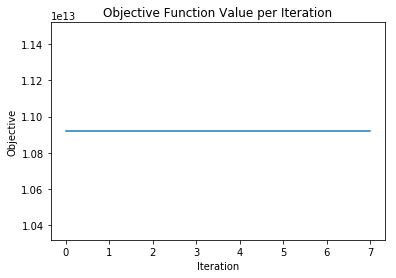

In [183]:
# Plot objective function value each iteration
model_score = glrmodel_1.score_history()
plt.xlabel("Iteration")
plt.ylabel("Objective")
plt.title("Objective Function Value per Iteration")
print(model_score)
plt.plot(model_score["iterations"], model_score["objective"])
plt.show()

Weird: looks like this has an enormous error function output and doesn't decrease that error whatsoever over the course of iterations.

I'll try manually defining loss functions here and see if that helps:

In [170]:
# note: khous_h2.types is a dict
loss_by_type = {'enum':'Categorical', 
                'int':'Quadratic'}
ordered_dtypes = [khous_h2.types[colname] for colname in khous_h2.columns]
col_loss_types = [loss_by_type[obj_type] for obj_type in ordered_dtypes]
col_loss_types[:5]

['Quadratic', 'Quadratic', 'Categorical', 'Quadratic', 'Quadratic']

In [172]:
glrmodel_2 = H2OGeneralizedLowRankEstimator(k=10, 
                                       max_iterations=100, 
                                       loss_by_col=col_loss_types, 
                                       impute_original=True)
glrmodel_2.train(training_frame=khous_h2)

glrm Model Build progress: |██████████████████████████████████████████████| 100%


               timestamp    duration  iterations  step_size     objective
0    2018-07-04 12:58:56   0.625 sec         0.0   0.666667  9.575458e+12
1    2018-07-04 12:58:56   0.750 sec         1.0   0.444444  9.575458e+12
2    2018-07-04 12:58:56   0.864 sec         2.0   0.222222  9.575458e+12
3    2018-07-04 12:58:56   0.991 sec         3.0   0.074074  9.575458e+12
4    2018-07-04 12:58:57   1.154 sec         4.0   0.018519  9.575458e+12
5    2018-07-04 12:58:57   1.276 sec         5.0   0.003704  9.575458e+12
6    2018-07-04 12:58:57   1.512 sec         6.0   0.000617  9.575458e+12
7    2018-07-04 12:58:58   2.051 sec         7.0   0.000088  9.575458e+12


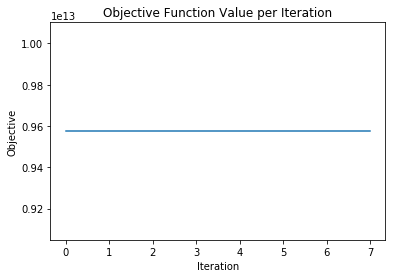

In [184]:
# Plot objective function value each iteration
model_score = glrmodel_2.score_history()
plt.xlabel("Iteration")
plt.ylabel("Objective")
plt.title("Objective Function Value per Iteration")
print(model_score)
plt.plot(model_score["iterations"], model_score["objective"])
plt.show()

Well that ran fine, but changed nothing.

In [ ]:
# trying something else copied directly from an example, but produces an error:
# glrmodel_4.train(x=khous_h2.names, training_frame=khous_h2)

## Test and use model

In [97]:
glrmodel_2.proj_archetypes(khous_h2)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
685.98,41.2626,RL,86.6412,13495.3,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8.13131,5.22727,1998.48,2001.81,Gable,CompShg,VinylSd,VinylSd,BrkFace,336.958,Gd,TA,PConc,Gd,TA,No,GLQ,783,Unf,26.202,823.808,1633.01,GasA,Ex,Y,SBrkr,1663.53,488.232,1.77636e-15,2151.76,0.651515,0.010101,2.06061,0.510101,3.05556,1,Gd,8.09091,Typ,1.12626,Gd,Attchd,2000.02,Fin,2.69192,743,TA,TA,Y,180.46,88.6616,10.1616,2.38384,16.5556,2.80303,nan,nan,nan,10.101,6.66667,2007.78,WD,Normal,321946
401.75,70,RL,90.0375,163514,Pave,nan,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6.25,5.75,1964.75,1984.5,Gable,CompShg,Plywood,Plywood,None,205.75,TA,TA,CBlock,Gd,TA,Gd,ALQ,1100.25,Unf,241.75,338.5,1680.5,GasA,TA,Y,SBrkr,1730.75,216.75,0,1947.5,1.25,0.25,2,0,3,1,Gd,6.75,Typ,2,Gd,Attchd,1964.75,Fin,2,542.5,TA,TA,Y,262.5,36.5,0,0,-1.77636e-15,0,nan,nan,Shed,300,6.5,2007.75,WD,Normal,295738
808.298,63.0124,RL,69.0475,11014.5,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,6.06832,6.27329,1946.04,1975.6,Gable,CompShg,Wd Sdng,Wd Sdng,None,83.3851,TA,TA,CBlock,TA,TA,No,Unf,251.28,Unf,48.236,590.46,889.975,GasA,TA,Y,SBrkr,1127.55,721.304,1.2236,1850.08,0.186335,-6.93889e-17,1.65839,0.639752,3.52795,1,TA,7.57764,Typ,0.993789,Gd,Attchd,1957.54,Unf,1.65217,421.416,TA,TA,Y,81.8634,50.9006,40.9503,3.56522,39.8634,7.80745,nan,nan,nan,45.3416,6.85093,2007.66,WD,Normal,177573
732.146,41.3605,RL,73.2582,11194,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5.40136,5.84354,1967.43,1978.04,Gable,CompShg,HdBoard,HdBoard,None,75.5102,TA,TA,CBlock,TA,TA,No,ALQ,660.541,Unf,117.224,319.095,1096.86,GasA,TA,Y,SBrkr,1178.79,24.2993,0,1203.09,0.789116,6.93889e-18,1.17347,0.238095,2.65646,1.0102,TA,5.66327,Typ,0.595238,nan,Attchd,1970.63,Unf,1.65306,466.439,TA,TA,Y,102.041,30.483,12.398,4.81973,23.9184,4.16327,nan,nan,nan,85.5442,5.96939,2008.05,WD,Normal,152158
721.656,50.9825,RL,59.4228,7494.69,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4.82456,5.72281,1942.36,1968.73,Gable,CompShg,MetalSd,MetalSd,None,23.7333,TA,TA,CBlock,TA,TA,No,Unf,208.119,Unf,20.0772,509.509,737.705,GasA,TA,Y,SBrkr,865.467,190.902,2.60351,1058.97,0.175439,-2.08167e-17,1.05263,0.136842,2.4807,1,TA,5.28772,Typ,0.203509,nan,Detchd,1959.94,Unf,1.02105,278.288,TA,TA,Y,30.7754,18.2105,48.9965,0.631579,4.75088,-8.88178e-15,nan,nan,nan,34.6807,6.14737,2007.79,WD,Normal,106640
709.16,52.2667,RL,68.104,10570.1,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5.76,6.17333,1966.87,1983.2,Gable,CompShg,VinylSd,VinylSd,None,102.427,TA,TA,CBlock,TA,TA,No,ALQ,555.773,Unf,98.2533,359.213,1013.24,GasA,Ex,Y,SBrkr,1130.57,236.28,-8.88178e-16,1366.85,0.0933333,1.02667,1.37333,0.32,2.88,0.986667,TA,6.08,Typ,0.653333,nan,Attchd,1971.29,Unf,1.65333,434.427,TA,TA,Y,120.173,39.3467,14.8,8.6,23.8667,4.44089e-16,nan,nan,nan,25.0667,6.70667,2007.61,WD,Normal,165198
593.588,68.2353,RL,79.1206,10902.7,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5.82353,5.64706,1920.76,1973.71,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,197.059,Unf,79.1176,676.647,952.824,GasA,Ex,Y,SBrkr,

               timestamp    duration  iterations  step_size     objective
0    2018-07-04 12:54:40   0.753 sec         0.0   0.666667  1.091993e+13
1    2018-07-04 12:54:40   0.911 sec         1.0   0.444444  1.091993e+13
2    2018-07-04 12:54:41   1.056 sec         2.0   0.222222  1.091993e+13
3    2018-07-04 12:54:41   1.247 sec         3.0   0.074074  1.091993e+13
4    2018-07-04 12:54:41   1.410 sec         4.0   0.018519  1.091993e+13
5    2018-07-04 12:54:41   1.585 sec         5.0   0.003704  1.091993e+13
6    2018-07-04 12:54:41   1.759 sec         6.0   0.000617  1.091993e+13
7    2018-07-04 12:54:41   1.920 sec         7.0   0.000088  1.091993e+13


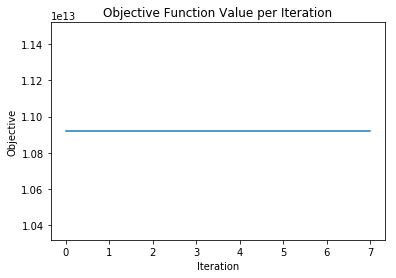

In [182]:
# Plot objective function value each iteration
model_score = glrmodel_1.score_history()
plt.xlabel("Iteration")
plt.ylabel("Objective")
plt.title("Objective Function Value per Iteration")
print(model_score)
plt.plot(model_score["iterations"], model_score["objective"])
plt.show()

In [99]:
glrmodel_2.cross_validation_holdout_predictions

Model Details
H2OGeneralizedLowRankEstimator :  Generalized Low Rank Modeling
Model Key:  GLRM_model_python_1530645406753_1


ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 10029528439220.22
Misclassification Error (Categorical): 16314.0
Scoring History: 


,timestamp,duration,iterations,step_size,objective
,2018-07-03 12:17:37,2.458 sec,0.0,0.6666667,10029528807927.8671875
,2018-07-03 12:17:37,2.831 sec,1.0,0.4444444,10029528807927.8671875
,2018-07-03 12:17:37,2.974 sec,2.0,0.2222222,10029528807927.8671875
,2018-07-03 12:17:38,3.119 sec,3.0,0.0740741,10029528807927.8671875
,2018-07-03 12:17:38,3.243 sec,4.0,0.0185185,10029528807927.8671875
,2018-07-03 12:17:38,3.367 sec,5.0,0.0037037,10029528807927.8671875
,2018-07-03 12:17:38,3.501 sec,6.0,0.0006173,10029528807927.8671875
,2018-07-03 12:17:38,3.626 sec,7.0,0.0000882,10029528807927.8671875


<bound method ModelBase.cross_validation_holdout_predictions of >

In [100]:
glrmodel_2.weights

Model Details
H2OGeneralizedLowRankEstimator :  Generalized Low Rank Modeling
Model Key:  GLRM_model_python_1530645406753_1


ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 10029528439220.22
Misclassification Error (Categorical): 16314.0
Scoring History: 


,timestamp,duration,iterations,step_size,objective
,2018-07-03 12:17:37,2.458 sec,0.0,0.6666667,10029528807927.8671875
,2018-07-03 12:17:37,2.831 sec,1.0,0.4444444,10029528807927.8671875
,2018-07-03 12:17:37,2.974 sec,2.0,0.2222222,10029528807927.8671875
,2018-07-03 12:17:38,3.119 sec,3.0,0.0740741,10029528807927.8671875
,2018-07-03 12:17:38,3.243 sec,4.0,0.0185185,10029528807927.8671875
,2018-07-03 12:17:38,3.367 sec,5.0,0.0037037,10029528807927.8671875
,2018-07-03 12:17:38,3.501 sec,6.0,0.0006173,10029528807927.8671875
,2018-07-03 12:17:38,3.626 sec,7.0,0.0000882,10029528807927.8671875


<bound method ModelBase.weights of >

do I need to set categorical variables as asfactor()  ?


Jason thought he remembered 'categorical' getting parsed differently from 'enum', hence the little loop below which changes all the dtypes to 'categorical'.  So I might want want to try a similar thing with just my enums and see what changes.

## Scratch

In [ ]:
types = {} 
for k in region_a_df.types: 
    types[k] = 'categorical' 
    types['C1'] = 'string' 
region_a_df = h2o.H2OFrame(np.array(region_answers)[:,1:], column_types=types) region_a_df.describe()

glrm.train(y=y, training_frame=region_a_df)

In [ ]:
loss_by_type = {np.dtype('object'):"Categorical", 
                np.dtype('int64'):"Quadratic", 
                np.dtype('float64'):"Quadratic", 
                np.dtype('bool'):"Hinge"}
col_loss_types = [loss_by_type[obj_type] for obj_type in khous_df.dtypes]